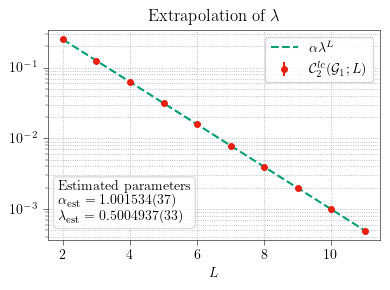

$\alpha_{\mathrm{est}} = 1.001534(37)$
$\lambda_{\mathrm{est}} = 0.5004937(33)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from matplotlib import rcParams

# Configure Matplotlib to use LaTeX for text and set fonts
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["CMU Serif"],  # Correct font name
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

data = np.loadtxt(f"analisi_dati_2point/SG_media_bare1.dat", comments='#')

L = data[:, 0]  # Lengths
correlation = data[:, 1]  # Correlations
errors = data[:, 2]  # Errors on correlations

# Simplified function to fit: f(L) = alpha * lambda^L
def simple_fit(L, alpha, lambda_):
    return alpha * lambda_**L

# Non-linear fit considering errors
popt, pcov = curve_fit(simple_fit, L, correlation, sigma=errors, absolute_sigma=True)
alpha_est, lambda_est = popt
alpha_err, lambda_err = np.sqrt(np.diag(pcov))  # Errors on estimated parameters

# Function to format parameters into the correct format
def format_param(value, error):
    # Find the number of significant digits in the error
    number_digits_errors = 2
    error_digits = -int(np.floor(np.log10(abs(error)))) + number_digits_errors - 1
    rounded_value = round(value, error_digits)
    rounded_error = round(error * 10**error_digits)
    return f"{rounded_value:.{error_digits}f}({rounded_error})"

# Plot the data and fitted function
plt.figure(figsize=(4, 3))
plt.errorbar(L, correlation, yerr=errors, fmt='o', label='$\mathcal{C}_{2}^{lc}(\mathcal{G}_1;L)$', markersize=4, color='#e61f0f')

# Plot the fitted curve
L_fit = np.linspace(min(L), max(L), 100)
plt.plot(L_fit, simple_fit(L_fit, alpha_est, lambda_est), '--', label='$\\alpha \\lambda^L$', color='#009e73')

# Format the results
alpha_text = r'$\alpha_{{\mathrm{{est}}}} = {}$'.format(format_param(alpha_est, alpha_err))
lambda_text = r'$\lambda_{{\mathrm{{est}}}} = {}$'.format(format_param(lambda_est, lambda_err))

# Add fitted parameters as text on the plot
plt.text(0.03, 0.18, f'Estimated parameters\n{alpha_text}\n{lambda_text}', transform=plt.gca().transAxes,
          verticalalignment='center',
          bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round,pad=0.3', alpha=0.8))

# Axis labels and title
plt.xlabel(r'$L$', fontsize=10)
plt.title(r'Extrapolation of $\lambda$', fontsize=12)

# Logarithmic scale on y-axis
plt.yscale('log')

# Legend
plt.legend(loc='upper right')

ax = plt.gca()  # Get the axes object
ax.spines['top'].set_linewidth(0.4)   # Top border line width
ax.spines['right'].set_linewidth(0.4) # Right border line width
ax.spines['bottom'].set_linewidth(0.4) # Bottom border line width
ax.spines['left'].set_linewidth(0.4)   # Left border line width

ax.tick_params(axis='both', which='major', width=0.4)  # Major ticks thinner
ax.tick_params(axis='both', which='minor', width=0.3)  # Minor ticks even thinner

# Modify marker and line thickness
plt.grid(True, which="both", ls="dotted", linewidth=0.6)
plt.tight_layout()

# Save plot as PDF
plt.savefig('Extrapolation_lambda_param.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

# Print the formatted parameter estimates
print(f'{alpha_text}')
print(f'{lambda_text}')
